In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


caracteristics = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/caracteristics.csv',encoding='latin-1', sep=",")
places = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/places.csv', sep=",")
users = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/users.csv', sep=",")
vehicles = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/vehicles.csv', sep=",")



C:\Users\mnhelal\AppData\Local\Temp\ipykernel_9136\3573262418.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  caracteristics = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/caracteristics.csv',encoding='latin-1', sep=",")
C:\Users\mnhelal\AppData\Local\Temp\ipykernel_9136\3573262418.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  places = pd.read_csv('C:/Users/mnhelal/OneDrive - Université Paris 1 Panthéon-Sorbonne/Bureau/Paris/Algorithmique et Python/archive/places.csv', sep=",")


In [2]:

print(places.pr.isna().sum())
print(places.pr1.isna().sum())


425215
426522


<AxesSubplot:xlabel='index'>

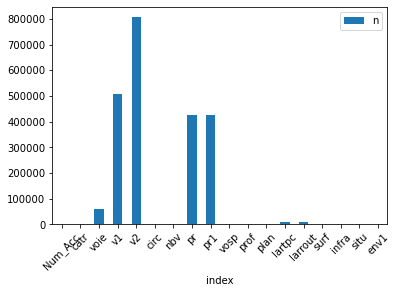

In [3]:

places.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)
#Too many missing data for V1,V2, pr and pr1
#lartpc abd larrout isn't pertinent (and i dont understand them personally)

In [12]:


places.env1.value_counts(dropna=False)
#Beaucoup de valeurs codé 0 (des valeurs manquantes en vrai), je propose de la dropper


0.0     477933
99.0    319986
3.0      40790
NaN       1276
Name: env1, dtype: int64

In [16]:
places = places.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout', 'voie', 'env1'], axis=1)

In [19]:
places

,Num_Acc,catr,circ,nbv,vosp,prof,plan,surf,infra,situ
0,201600000001,3.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0
1,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0
2,201600000003,3.0,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0
3,201600000004,4.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,201600000005,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0
839981,200500087951,4.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0
839982,200500087952,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0
839983,200500087953,4.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [20]:
print(places.catr.value_counts(dropna=False))
print(places.nbv.value_counts(dropna=False)) #nombre de voie: bizarre car il y a maximum 5 voie dane une route.. alors qu'ici
#on a des valeurs +10...

4.0    425061
3.0    262690
2.0     67918
1.0     61077
9.0     16084
6.0      5520
5.0      1634
NaN         1
Name: catr, dtype: int64
2.0     464716
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
NaN       1790
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
24.0         6
14.0         6
22.0         5
70.0         5
60.0         3
31.0         3
16.0         2
53.0         2
45.0         2
27.0         2
17.0         2
65.0         1
84.0         1
39.0         1
54.0         1
29.0         1
62.0         1
99.0         1
42.0         1
41.0         1
36.0         1
44.0         1
33.0         1
52.0         1
28.0         1
91.0         1
86.0         1
76.0         1
23.0         1
18.0         1
Name: nbv, dtype: int64


In [60]:
#vosp	prof	plan	surf	infra	situ
print(places.vosp.value_counts(dropna=False)) #trop de valeurs manquantes.. Presque 700000 de 0
print(places.prof.value_counts(dropna=False)) #0: 63849 et 1000 na
print(places.plan.value_counts(dropna=False)) #57847 et 1000 na
print(places.surf.value_counts(dropna=False)) #0: 26000 et 1000 na
print(places.infra.value_counts(dropna=False)):#0: means aucun, 700000 et 1000 na
print(places.situ.value_counts(dropna=False)): #0:43000 et 1000 na
    
#on devrait probablement dropper vosp et infra, et pour les autres peut être les ajoutés à la plus grande modalité

0.0    787021
3.0     23473
1.0     16570
2.0     11281
NaN      1640
Name: vosp, dtype: int64
1.0    634776
2.0    114043
0.0     63894
3.0     15130
4.0     11081
NaN      1061
Name: prof, dtype: int64
1.0    639903
2.0     68483
3.0     61946
0.0     57847
4.0     10730
NaN      1076
Name: plan, dtype: int64
1.0    652322
2.0    143254
0.0     26998
7.0      5474
9.0      4483
5.0      2643
8.0      2159
NaN      1017
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64
0.0    747965
5.0     50330
3.0     12853
2.0     11720
1.0      6994
6.0      5299
4.0      3034
NaN      1278
7.0       512
Name: infra, dtype: int64
1.0    722069
3.0     48818
0.0     43291
4.0     14493
2.0      5191
5.0      5121
NaN      1002
Name: situ, dtype: int64


In [62]:
places = places.drop(['vosp', 'infra'], axis=1)

KeyError: "['vosp', 'infra'] not found in axis"

In [63]:
places

,Num_Acc,catr,circ,nbv,prof,plan,surf,situ
0,201600000001,3.0,2.0,0.0,1.0,3.0,1.0,1.0
1,201600000002,3.0,1.0,0.0,1.0,2.0,1.0,1.0
2,201600000003,3.0,2.0,2.0,1.0,3.0,2.0,3.0
3,201600000004,4.0,2.0,0.0,1.0,1.0,1.0,1.0
4,201600000005,4.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,2.0,3.0,1.0,1.0,1.0,1.0
839981,200500087951,4.0,2.0,2.0,1.0,2.0,1.0,1.0
839982,200500087952,4.0,1.0,2.0,1.0,1.0,1.0,1.0
839983,200500087953,4.0,2.0,0.0,1.0,1.0,1.0,1.0


<AxesSubplot:xlabel='index'>

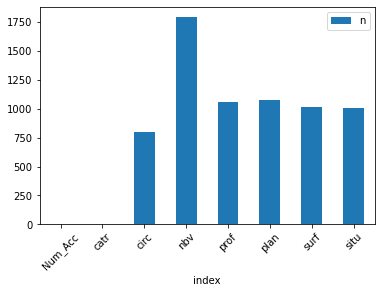

In [64]:
places.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)


In [13]:
places.catr.value_counts()
# Most accidents occur in communal ways and departmental roads (82%)
# with highways only accounting for 7% of the total number of accidents

4.0    425061
3.0    262690
2.0     67918
1.0     61077
9.0     16084
6.0      5520
5.0      1634
Name: catr, dtype: int64

In [8]:
#BDD caracteristics
caracteristics

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,416.0,"sans, LEBLOND(RUE M. ET",NaN,NaN,NaN,974
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,416.0,"SANS, PRESIDENT MITTERAN",NaN,NaN,NaN,974
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,416.0,"SANS, LEBLOND(RUE M. ET",NaN,NaN,NaN,974
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,416.0,"SANS, HUBERT DE LISLE(BO",NaN,NaN,NaN,974


<AxesSubplot:xlabel='index'>

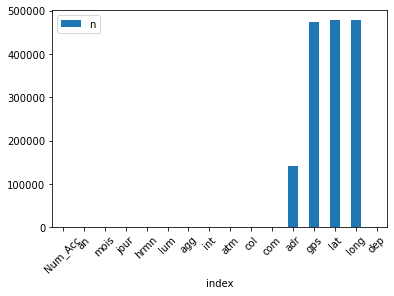

In [4]:
caracteristics.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)


In [9]:
caracteristics = caracteristics.drop(['adr', 'lat', 'long'], axis = 1)

<AxesSubplot:xlabel='index'>

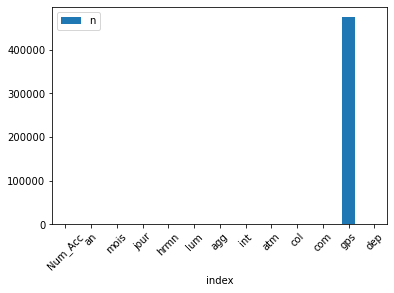

In [10]:
caracteristics.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [11]:
domtom = [973,974,976, 975] #But this doesn't include les Antilles (Martinique or Guadeloupe) cause they're not departements

caracteristics = caracteristics[~caracteristics.dep.isin(domtom)]
caracteristics

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,gps,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,M,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,M,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,M,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,M,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,M,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839895,200500087865,5,12,12,730,1,1,1,2.0,4.0,213.0,NaN,972
839896,200500087866,5,12,13,630,2,1,1,8.0,6.0,213.0,NaN,972
839897,200500087867,5,12,12,700,1,1,1,1.0,6.0,213.0,NaN,972
839898,200500087868,5,12,2,1200,1,2,1,1.0,6.0,213.0,NaN,972


In [12]:
# Dropping les Antilles so we can stay on only le Métropole
caracteristics = caracteristics[caracteristics.gps != "A"]
caracteristics

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,gps,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,M,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,M,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,M,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,M,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,M,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839895,200500087865,5,12,12,730,1,1,1,2.0,4.0,213.0,NaN,972
839896,200500087866,5,12,13,630,2,1,1,8.0,6.0,213.0,NaN,972
839897,200500087867,5,12,12,700,1,1,1,1.0,6.0,213.0,NaN,972
839898,200500087868,5,12,2,1200,1,2,1,1.0,6.0,213.0,NaN,972


In [16]:
#checking we're only in Métropole
caracteristics.dep.nunique()

98

In [14]:
GPS = ['0', 'S', 'T', 'R', 'C', 'G', 'P']
caracteristics[caracteristics['gps'].isin(GPS)]
# I did this to check the departement number of these weird values, and they're all in Metropole

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,gps,dep
360095,201100061509,11,3,11,2115,5,2,7,1.0,6.0,115.0,S,750
409802,201000044242,10,12,28,940,1,2,1,4.0,7.0,621.0,G,780
428843,201000063283,10,9,2,425,3,2,1,1.0,6.0,113.0,S,750
429155,201000063595,10,8,4,700,2,2,4,1.0,6.0,114.0,T,750
432044,201000066484,10,9,25,1815,1,2,2,1.0,3.0,116.0,T,750
436922,200900001983,9,3,26,1945,5,2,5,2.0,3.0,111.0,R,750
438099,200900003160,9,4,24,1935,1,2,5,1.0,3.0,118.0,C,750
451017,200900016078,9,8,10,140,5,2,5,1.0,3.0,112.0,C,750
455738,200900020799,9,9,23,1418,1,2,1,1.0,3.0,115.0,P,750
475668,200900040729,9,12,6,2230,5,2,5,1.0,6.0,120.0,R,750


In [17]:
print(caracteristics.lum.value_counts(dropna=False))
print(caracteristics.int.value_counts(dropna=False)) #0: 106
print(caracteristics.atm.value_counts(dropna=False)) #55 nan
print(caracteristics.col.value_counts(dropna=False)) #11 nan
print(caracteristics.com.value_counts(dropna=False))
print(caracteristics.dep.value_counts(dropna=False))

1    564301
5    137644
3     62952
2     47857
4      6608
Name: lum, dtype: int64
1    582445
2    101849
3     72488
6     21915
9     12883
4     11384
5      9339
7      6059
8       894
0       106
Name: int, dtype: int64
1.0    662247
2.0     85856
8.0     27015
3.0     17674
7.0      7750
9.0      6213
5.0      5469
4.0      5127
6.0      1978
NaN        33
Name: atm, dtype: int64
6.0    271101
3.0    237263
2.0     94745
7.0     85217
1.0     79983
5.0     26115
4.0     24931
NaN         7
Name: col, dtype: int64
55.0     32548
88.0     13982
63.0     10174
113.0     9851
7.0       9722
         ...  
892.0        1
878.0        1
897.0        1
886.0        1
847.0        1
Name: com, Length: 925, dtype: int64
750    87479
130    52163
930    33810
920    31261
940    29389
       ...  
80      1409
90      1272
230      953
480      949
150      925
Name: dep, Length: 98, dtype: int64


<AxesSubplot:>

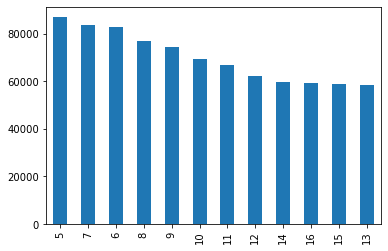

In [35]:
caracteristics.an.value_counts().plot(kind = 'bar')


In [93]:
users

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
1876000,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0,B01
1876001,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1965.0,C01
1876002,200500087953,1.0,1,4,1,5.0,23.0,0.0,0.0,0.0,1990.0,A01
1876003,200500087954,1.0,1,4,1,0.0,13.0,0.0,0.0,0.0,1951.0,A01


In [95]:
users.catu.value_counts(dropna=False)

1    1397701
2     319388
3     155649
4       3267
Name: catu, dtype: int64

In [18]:
users = users.drop(['place'], axis = 1)

<AxesSubplot:xlabel='index'>

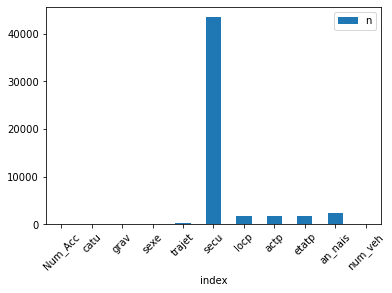

In [103]:
users.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [115]:
print(users.num_veh.value_counts(dropna=False))
#trajet: 55000 0 et 369 nan
#secu: 68000 0 et 43000 nan
#loctp, actp, etatp 1 700 000 de 0


A01    1142343
B01     464767
B02     173341
C01      48869
C03      19279
        ...   
B07          1
B09          1
A08          1
C06          1
D56          1
Name: num_veh, Length: 129, dtype: int64


In [116]:
users = users.drop(['locp', 'actp', 'etatp', 'num_veh'], axis = 1)
users

,Num_Acc,catu,grav,sexe,trajet,secu,an_nais
0,201600000001,1,1,2,0.0,11.0,1983.0
1,201600000001,1,3,1,9.0,21.0,2001.0
2,201600000002,1,3,1,5.0,11.0,1960.0
3,201600000002,2,3,1,0.0,11.0,2000.0
4,201600000002,2,3,2,0.0,11.0,1962.0
...,...,...,...,...,...,...,...
1876000,200500087953,1,1,1,0.0,13.0,1972.0
1876001,200500087953,1,1,1,0.0,13.0,1965.0
1876002,200500087953,1,4,1,5.0,23.0,1990.0
1876003,200500087954,1,4,1,0.0,13.0,1951.0


In [2]:
vehicles

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
...,...,...,...,...,...,...,...,...,...
1433384,200500087952,0.0,7,0,0.0,2.0,3.0,1.0,A01
1433385,200500087953,0.0,7,0,0.0,2.0,3.0,19.0,B01
1433386,200500087953,0.0,2,0,0.0,2.0,1.0,17.0,A01
1433387,200500087953,0.0,7,0,0.0,2.0,1.0,1.0,C01


In [19]:
vehicles.occutc.value_counts(dropna=False)
#obsm (obstacle mobile heurté) : 300 000 de 0
#obs (obstacle immobile heurté, par ex un arbre): trop de 0 (1 200 000)
#occutc: Nombre d’occupants dans le transport en commun. 

0      1423666
1         4770
2          696
10         554
3          359
        ...   
184          1
153          1
240          1
125          1
470          1
Name: occutc, Length: 114, dtype: int64

In [21]:
vehicles = vehicles[['Num_Acc', 'catv', 'occutc', 'choc']]
vehicles

,Num_Acc,catv,occutc,choc
0,201600000001,7,0,1.0
1,201600000001,2,0,7.0
2,201600000002,7,0,1.0
3,201600000003,7,0,6.0
4,201600000004,32,0,1.0
...,...,...,...,...
1433384,200500087952,7,0,3.0
1433385,200500087953,7,0,3.0
1433386,200500087953,2,0,1.0
1433387,200500087953,7,0,1.0


In [85]:
from functools import reduce
Merge1 = [cara, places]
accidents = reduce(lambda left,right: pd.merge(left,right,on=['Num_Acc'],how='left'),Merge1)
accidents

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,3.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,4.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819357,200500087865,5,12,12,730,1,1,1,2.0,4.0,...,1.0,3.0,4.0,0.0,1.0,1.0,2.0,0.0,1.0,99.0
819358,200500087866,5,12,13,630,2,1,1,8.0,6.0,...,3.0,2.0,2.0,0.0,4.0,2.0,0.0,0.0,3.0,99.0
819359,200500087867,5,12,12,700,1,1,1,1.0,6.0,...,1.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,99.0
819360,200500087868,5,12,2,1200,1,2,1,1.0,6.0,...,3.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0


In [80]:
users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [82]:
users.shape

(1876005, 12)